## Fcc-ee-higgs analysis

Higgs coupling analyses for FCC-ee

#### Preparing the environment

In [1]:
%%bash

# Create a new working directory
mkdir -p test_ana
cd test_ana

# Clone dataset repositories
test -e fcc_datasets || git clone https://github.com/cbernet/fcc_datasets.git
test -e fcc_ee_higgs || git clone https://github.com/cbernet/fcc-ee-higgs.git fcc_ee_higgs
test -e cpyroot      || git clone https://github.com/cbernet/cpyroot.git
test -e tdrstyle     || git clone https://github.com/cbernet/tdr-style.git tdrstyle

Initialized empty Git repository in /eos/user/j/jcervant/SWAN_projects/FCC-Gallery/testingGallery/test_ana/fcc_datasets/.git/
Initialized empty Git repository in /eos/user/j/jcervant/SWAN_projects/FCC-Gallery/testingGallery/test_ana/fcc_ee_higgs/.git/
Initialized empty Git repository in /eos/user/j/jcervant/SWAN_projects/FCC-Gallery/testingGallery/test_ana/cpyroot/.git/
Initialized empty Git repository in /eos/user/j/jcervant/SWAN_projects/FCC-Gallery/testingGallery/test_ana/tdrstyle/.git/


#### List one of the heppy(papas) datasets:

In [2]:
import sys
import os

sys.path.append("test_ana")
os.environ['FCCDATASETBASEOUT']="/eos/experiment/fcc/ee/datasets"

import ROOT
ROOT.PyConfig.IgnoreCommandLineOptions = True

from fcc_datasets.dataset import Dataset
import fcc_datasets.basedir as basedir

def process_dataset(dsname):
    ds = Dataset(dsname)
    print ds

import sys
import os
import fcc_datasets

dsname = "heppy/ee_to_ZH_Z_to_ll/CMS/Jan30/ee_to_ZH_Oct30"
basedir.set_basename(basedir.basename())

process_dataset(dsname)


Welcome to JupyROOT 6.12/04
heppy/ee_to_ZH_Z_to_ll/CMS/Jan30/ee_to_ZH_Oct30
/eos/experiment/fcc/ee/datasets/heppy/ee_to_ZH_Z_to_ll/CMS/Jan30/ee_to_ZH_Oct30
fcc_ee_higgs.analyzers.ZHTreeProducer.ZHTreeProducer_1/tree.root : {'good': True, 'n_events': 30009, 'zero_size': False}
{'processing': {'nfiles': 100, 'ngoodfiles': 98},
 'sample': {'id': UUID('39eb1292-e9b0-42ca-9536-f3d46a0f7ee4'),
            'jobtype': 'heppy',
            'mother': 'pythia/ee_to_ZH_Oct30',
            'nevents': 30009,
            'nfiles': 1,
            'ngoodfiles': 1,
            'pattern': 'fcc_ee_higgs.analyzers.ZHTreeProducer.ZHTreeProducer_1/tree.root'},
 'software': {'fcc_datasets': u'df41188443d8b15436543f854ee7de77a6934036',
              'fcc_ee_higgs': u'b01b8340ea89aa7cdbfbf9ac510f0bafc8f308b0',
              'heppy': u'7cb2d942997594a80988187d0ab50901627575b4'}}


### Start the example

ZZ
ZH
WW
variable:
recoil_m
cut:
(zeds_1_iso_e/zeds_1_e<0.2) && (zeds_1_iso_e/zeds_1_e<0.2) && zeds_1_e>0 && zeds_2_e>0 && (abs(zeds_m-91)<4. && zeds_pt>10 && zeds_pz<50 && zeds_acol>100 && zeds_cross>10) && (zeds_1_pdgid==-zeds_2_pdgid)  && ((jets_1_e<0 || jets_1_22_e/jets_1_e<0.8) && (jets_2_e<0 || jets_2_22_e/jets_2_e<0.8))


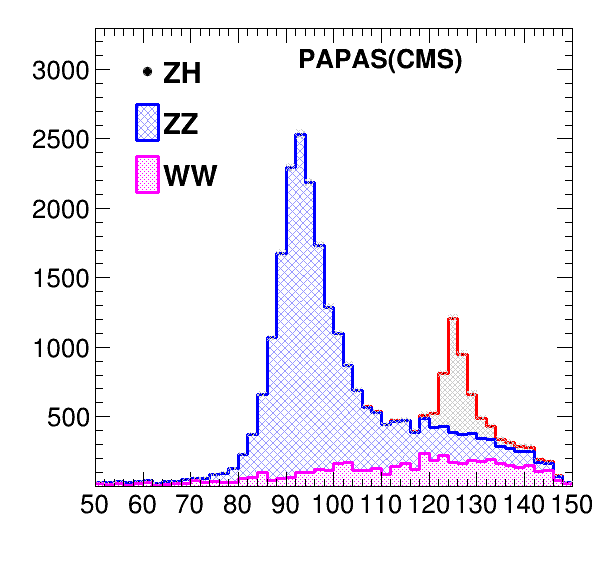

Info in <TCanvas::Print>: png file recoil_m_zh_inclusive_cms.png has been created


In [5]:
import sys
sys.path.append("test_ana")
sys.path.append("test_ana/fcc_ee_higgs")
sys.path.append("test_ana/fcc_ee_higgs/plot")

from cpyroot import *

from tdrstyle.tdrstyle import setTDRStyle
setTDRStyle(square=True)
from fcc_ee_higgs.components.tools import load

from fitter import TemplateFitter, BaseFitter, BallFitter
from fcc_ee_higgs.plot.plotter import Plotter

import pprint
from IPython.display import Image

plot = None

from ROOT import TPaveText
infos = []
def print_info(detector, lumimb):
    lumi = int(lumimb/1e12)  # now in fb-1
    xmin, ymin = 0.62, 0.7
    xmax, ymax = xmin + 0.288, ymin + 0.15
    pave = TPaveText(xmin, ymin, xmax, ymax, 'ndc')
    pave.AddText(detector)
    pave.AddText('{lumi} fb^{{-1}}'.format(lumi=lumi))
    pave.SetTextSizePixels(28)
    pave.SetTextAlign(11)
    pave.SetBorderSize(0)
    pave.SetFillColor(0)
    pave.SetFillStyle(0)
    pave.Draw()
    infos.append(pave)
    
def get_cut_hbb(eff, fake, operator='||'):
    return '(((jets_1_bmatch==1 && rndm<{eff}) || (jets_1_bmatch==0 && rndm<{fake})) {op} \
((jets_2_bmatch==1 && rndm<{eff}) || (jets_2_bmatch==0 && rndm<{fake})))'.format(eff=eff, fake=fake, op=operator)
        
detector = 'cms'
if detector is 'cms':
    from fcc_ee_higgs.components.ZH_Zll import ZH, ZZ, WW
    b_wp = (0.6, 3e-3)    
elif detector is 'clic':
    from fcc_ee_higgs.components.ZH_Zll_clic import ZH, ZZ, WW
    b_wp = (0.8, 4e-3)
comps = [ZZ, ZH, WW]
ZH.name =  'ZH'
ZZ.name =  'ZZ'
WW.name =  'WW'
    
# lep_eff = 0.95
# b_wp = (0.6, 3e-3)
# b_wp = (0.7, 1.7e-2)

cut_leps = '(zeds_1_iso_e/zeds_1_e<0.2) && (zeds_1_iso_e/zeds_1_e<0.2) && zeds_1_e>0 && zeds_2_e>0'
cut_z = '(abs(zeds_m-91)<4. && zeds_pt>10 && zeds_pz<50 && zeds_acol>100 && zeds_cross>10) && (zeds_1_pdgid==-zeds_2_pdgid) '
# cut_eff_z = '(rndm<{lep_eff} && rndm<{lep_eff} && zeds_1_pt>7 && zeds_2_pt>7)'.format(lep_eff=lep_eff)
cut_rad = '((jets_1_e<0 || jets_1_22_e/jets_1_e<0.8) && \
(jets_2_e<0 || jets_2_22_e/jets_2_e<0.8))'
# cut_hbb = '(jets_1_b==1 && jets_2_b==1)'
cut_hbb = get_cut_hbb(b_wp[0], b_wp[1], ' || ')
cut_hinv = '(jets_1_e<0 && jets_2_e<0)'
cut_hvis = '(jets_1_e>0 && jets_2_e>0)'

cut_Z = ' && '.join([cut_leps, cut_z, cut_rad])


## Main 

from ROOT import RooRealVar, RooDataHist, RooHistPdf, RooArgList, RooArgSet, TH1

load(comps)
lumi = 500e12
# channel = 'inclusive'
channel = 'inclusive'
cut = cut_Z
if channel is 'bb':
    cut = ' && '.join([cut_Z, cut_hbb])
# lumi = 5e6  # 5ab-1

plotter = Plotter(comps, lumi)

var = 'recoil_m'
bins = 50, 50, 150

plotter.draw(var, cut, bins)


label = 'PAPAS\n(CMS)'
if detector is 'clic':
    label = 'PAPAS\n(CLIC-FCCee)'
latex = TLatex()
latex.DrawLatexNDC(0.50, 0.88, label)

plotname = '{var}_zh_{channel}_{detector}.png'.format(var=var, channel=channel, detector=detector)

gPad.SaveAs(plotname)


Image(plotname) 

### Fitting

In [6]:
tfitter = TemplateFitter(plotter.plot)
tfitter.draw_data()
tfitter.tresult.Print()


  RooFitResult: minimized FCN value: -142556, estimated distance to minimum: 9.8813e-08
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                   nWW    5.0266e+03 +/-  1.66e+02
                   nZH    2.4703e+03 +/-  8.20e+01
                   nZZ    2.0103e+04 +/-  1.85e+02

